In [1]:
import sys


import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris, load_digits, fetch_california_housing, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt


print("python version:", sys.version_info)
print(sklearn.__name__, sklearn.__version__)

python version: sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)
sklearn 0.23.2


## 1. 分类

https://scikit-learn.org/stable/modules/neighbors.html#classification

### 1.1 分类案例1：iris鸢尾花分类

https://scikit-learn.org/stable/datasets/index.html#iris-dataset

#### 一、加载数据

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X_data = iris['data']
y_data = iris['target']

In [4]:
X_data.shape, y_data.shape

((150, 4), (150,))

#### 二、切分训练集和测试集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1381, shuffle=True, test_size=0.3)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

#### 三、创建模型
<a id="args"></a>

In [7]:
'''
model = KNeighborsClassifier(n_neighbors=5, # k
                             weights = "uniform", # uniform不管远近权重都一样, distance权重和距离成反比, 自定义函数根据输入的坐标值返回对应的权重，达到自定义权重的目的
                             algorithm = "", # 三种构建方式：1.brute暴力法， 2. kd_tree kd树  3.ball_tree 球树 4.auto自动选择合适的方法构建，  数据量越大选kd_tree, 更大选ball_tree
                             leaf_size = "30", # 暴力法可以忽略，当使用kd树或球树时， 他是停止建子树的叶子结点数量的阈值 默认30，数据量增大，需要选择更大的值，否则速度慢，容易过拟合
                             metric = "minkowski", # 距离度量方法，一般欧式距离euclidean, manhattan曼哈顿距离，chebyshev切比雪夫距离，minkowski闵可夫斯基距离
                             metric_params = None,
                             p = 2, # p和metric结合使用，当metric是minkowski是，p=1为曼哈顿距离， p=2为欧式距离，默认2
                             # n_jobs = -1 # 指定多少个CPU进行计算， 默认是-1，也就是全部都算
                            )
'''
clf = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=None,)

#### 四、训练模型

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

#### 五、评估和预测

In [9]:
clf.score(X_test, y_test)

0.9555555555555556

In [10]:
test_pred = clf.predict(X_test)
test_pred.shape

(45,)

### 1.2 分类案例2: 手写数字识别

https://scikit-learn.org/stable/datasets/index.html#digits-dataset

#### 一、加载及切分数据

In [11]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
digits.images.shape

(1797, 8, 8)

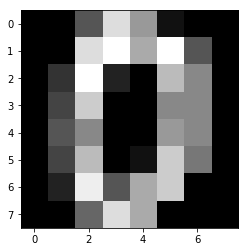

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap=plt.cm.gray)

In [14]:
X_data, y_data, X_image = digits.data, digits.target, digits.images
X_train, X_test, y_train, y_test, X_image_train, X_image_test = train_test_split(X_data, y_data, X_image, random_state=1, test_size=0.3)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#### 二、建模

In [16]:
digits_clf = KNeighborsClassifier()
digits_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
digits_clf.score(X_test, y_test)

0.9907407407407407

#### 三、观察预测错的样本

In [18]:
digits_pred = digits_clf.predict(X_test)
results = digits_pred == y_test
np.where(results == False)

(array([281, 298, 394, 523, 537]),)

In [19]:
error_idx = np.where(results == False)[0]
error_imgs = X_image_test[error_idx]

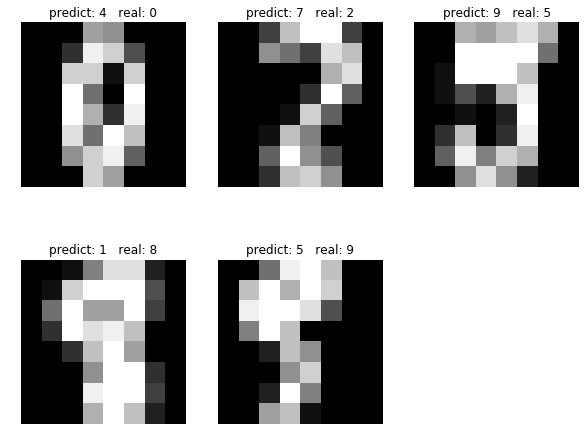

In [20]:
plt.figure(figsize=(10, 8))
for i, idx in enumerate(error_idx):
    plt.subplot(2, 3, i + 1)
    plt.title("predict: {0}   real: {1}".format(digits_pred[idx], y_test[idx]))
    plt.imshow(error_imgs[i], cmap=plt.cm.gray)
    plt.axis('off')
plt.show()

## 2. 回归

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression

### 2.1 回归案例1: 加利福尼亚房价预测数据集

https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset

如果下载我的代码库，加载房价数据集抛异常“No module named 'sklearn.externals.joblib'”，可能是sklearn版本跟我的不一致，删掉data下的文件就可以了。

In [21]:
house = fetch_california_housing(data_home="./data")
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
X_data, y_data = house.data, house.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1, test_size=0.3)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [23]:
rgs = KNeighborsRegressor()
rgs.fit(X_train, y_train)

KNeighborsRegressor()

In [24]:
rgs.score(X_test, y_test)

0.13109172460892482

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score

回归的score返回 $R^2$

* 什么是 $R^2$ ?

$R^2 = 1 - \frac{u}{v}$

$u$是残差平方和，$u = \sum (y\_pred - y\_true)^2$

$v$是平方和的总和，$v = \sum (y\_true - y\_true\_mean)^2 $

可能的最高得分为1.0，并且可能为负（因为该模型可能会更差）

In [25]:
def show_regressor_pred(pred, y_test, y_train, x_magnification=1, y_magnification=1):
    plt.figure(figsize=(18 * x_magnification, 9 * y_magnification))
    plt.plot(range(y_test.shape[0]), y_test, label="true")
    plt.plot(range(y_test.shape[0]), pred, label="prediction")
    plt.scatter(range(y_test.shape[0]), [np.mean(y_train)] * y_test.shape[0], label="mean", s=2, c="green")
    plt.xlabel("test sample index")
    plt.ylabel("label unit")
    plt.legend()
    plt.show()

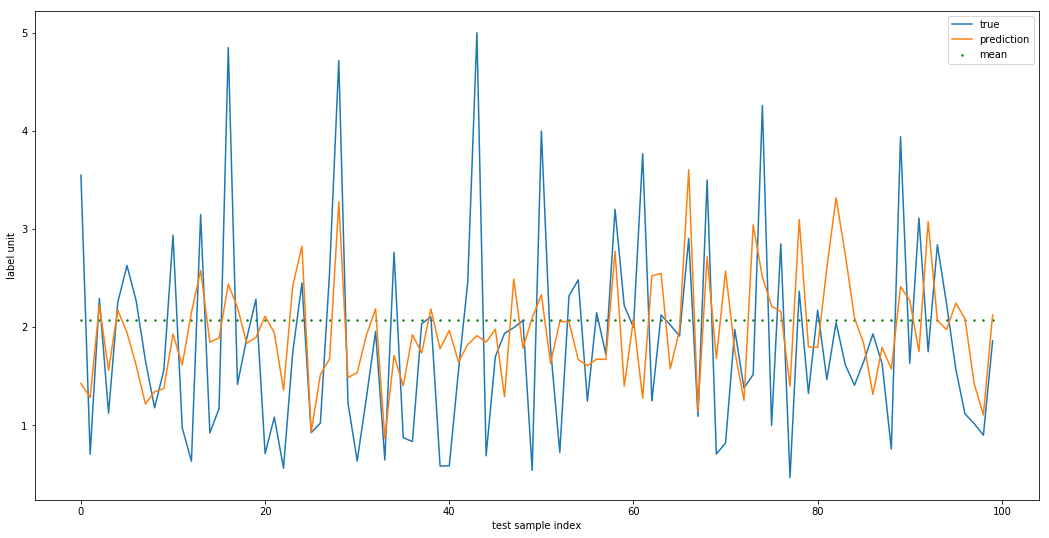

In [26]:
pred = rgs.predict(X_test)
show_regressor_pred(pred[:100], y_test[:100], y_train)

### 2.2 回归案例2: 完善人脸照片

https://scikit-learn.org/stable/datasets/index.html#olivetti-faces-dataset

In [27]:
face = fetch_olivetti_faces(data_home="./data")

face

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

<img src="./imgs/1.olivetti_faces.gif" width="700px">

In [28]:
train = face.data[face.target < 30]
test = face.data[face.target >= 30]

train.shape, test.shape

((300, 4096), (100, 4096))

In [29]:
X_train = train[:, :train.shape[1] // 2]
y_train = train[:, train.shape[1] // 2:]
X_test = test[:, :test.shape[1] // 2]
y_test = test[:, test.shape[1] // 2:]

In [30]:
estimator = KNeighborsRegressor()
estimator.fit(X_train, y_train)

KNeighborsRegressor()

In [31]:
pred = estimator.predict(X_test)

In [32]:
pred.shape

(100, 2048)

In [33]:
pred_splice = np.hstack((X_test, pred))
pred_splice.shape

(100, 4096)

In [34]:
pred_splice = pred_splice.reshape(-1, 64, 64)
pred_splice.shape

(100, 64, 64)

In [35]:
test = test.reshape(-1, 64, 64)
test.shape

(100, 64, 64)

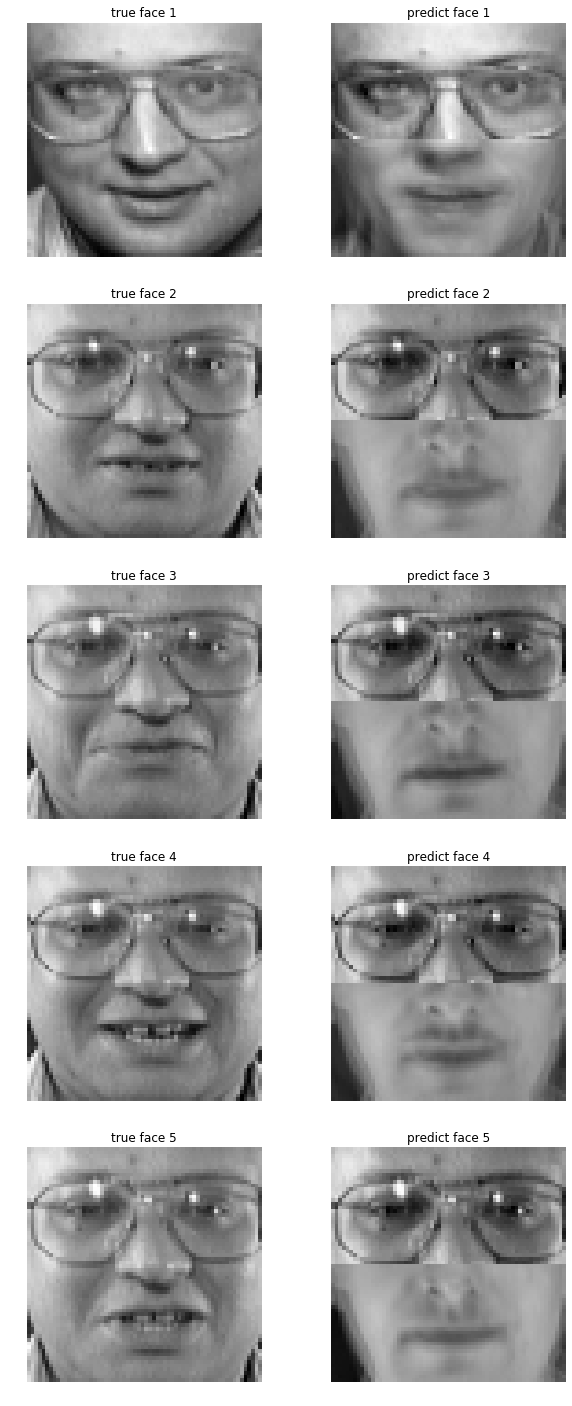

In [36]:
def show_comparison(test, pred_splice, img_num=10):
    plt.figure(figsize=(10, img_num * 5))
    for i in range(img_num): 
        plt.subplot(img_num, 2, 2 * i + 1)
        plt.title(f"true face {i+1}")
        plt.imshow(test[i], cmap="gray", )
        plt.axis('off')

        plt.subplot(img_num, 2, 2 * (i + 1))
        plt.title(f"predict face {i+1}")
        plt.imshow(pred_splice[i], cmap="gray")
        plt.axis('off')
    plt.show()
show_comparison(test, pred_splice, 5)

## 3. 总结

### 3.1 sklearn中的kNN

1. kNN分类和回归模型都放在sklearn.neighbors下  
    > from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
2. 参数
    > n_neighbors, weights, algorithm, leaf_size, metric, metric_params, p, n_jobs  
    > [点击回滚查看具体参数](#args)

### 3.2 机器学习基本流程

1. 加载数据
    > iris = load_iris()  
    > X_data, y_data = iris.data, iris.target
2. 切分训练集和测试集
    > from sklearn.model_selection import train_test_split  
    > X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1, test_size=0.3, shuffle=True)  
3. 创建模型
    > clf = KNeighborsClassifier()
4. 训练模型
    > clf.fit(X_train, y_train)
5. 评估模型
    > clf.score(X_test, y_test)   
    > 分类模型score方法返回准确率，回归模型score方法返回$R^2$

### 3.3 加载sklearn自带的数据集

1. sklearn的数据集放在sklearn.datasets下
    > from sklearn.datasets import load_iris, load_digits, fetch_california_housing, fetch_olivetti_faces  
2. 加载数据
    > iris = load_iris()  
    > X_data, y_data = iris.data, iris.target

## 作业  

1. 了解sklearn其他数据集，并用kNN进行实验。  
2. 熟练掌握sklearn中kNN的各个API及其参数。

## 相关链接  
<a href="./01.1.kNN.ipynb" style=""> 1.1 kNN k近邻算法原理 </a>  
  
<a href="./01.3.kNN-numpy.ipynb" style=""> 1.3 numpy实现kNN分类和回归 </a>  
<a href="./01.4.kNN-tf2.ipynb"> 1.4 TensorFlow2实现kNN分类和回归 </a>  
<a href="./01.5.kNN-torch1.ipynb"> 1.5 Pytorch1实现kNN分类和回归 </a>  

## 项目源码  
https://github.com/LossJ     
进入后点击Statistic-Machine-Learning  